In [97]:
import json
import matplotlib.pyplot as plt


# Đường dẫn tới file JSON
path_raw_data = '../data/processed/batdongsancomvn/chungcu/merged_chungcu.json'
# path_raw_data = 'preprocess_data1.json'

try:
    print("Start reading file...")

    # Mở và đọc file JSON
    with open(path_raw_data, 'r', encoding='utf-8') as file:
        raw_data = json.load(file)  # Đọc và chuyển đổi nội dung JSON


except FileNotFoundError:
    print(f"Error: File '{path_raw_data}' không tồn tại.")
except json.JSONDecodeError:
    print(f"Error: File '{path_raw_data}' không đúng định dạng JSON.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

print(raw_data)


data = raw_data

Start reading file...
[{'title': 'Quỹ căn chuyển nhượng Tháng 11 tòa Han Jardin N01-T6, T7 khu đô thị Ngoại Giao Đoàn, Tây Hồ Tây', 'url': 'https://batdongsan.com.vn/ban-can-ho-chung-cu-duong-nguyen-van-huyen-phuong-xuan-tao-prj-chung-cu-han-jardin/quy-chuyen-nhuong-tg-11-toa-n01-t6-t7-khu-do-ngoai-giao-doan-tay-tay-pr41344314', 'location': 'Bắc Từ Liêm, Hà Nội'}, {'title': 'Bán nhà tầng 1 tại TTVTVH ô tô đỗ cửa giá 3,65 tỷ VND tại Phố Mai Dịch, nhanh tay gọi ngay kẻo bay', 'url': 'https://batdongsan.com.vn/ban-can-ho-chung-cu-pho-mai-dich-phuong-mai-dich/ban-nha-tang-1-tai-ttvtvh-o-to-do-cua-gia-3-65-ty-vnd-tai-nhanh-tay-goi-ngay-keo-bay-pr41344031', 'location': 'Cầu Giấy, Hà Nội'}, {'title': 'Căn hộ Golden Land giá 9,25 tỷ VND, vị trí đắc địa tại Hà Nội', 'url': 'https://batdongsan.com.vn/ban-can-ho-chung-cu-duong-nguyen-trai-phuong-thanh-xuan-trung-prj-golden-land/-gia-9-ty-vnd-vi-tri-dac-dia-tai-ha-noi-pr41265966', 'location': 'Thanh Xuân, Hà Nội', 'area': 166.0, 'price': 9250.0, '

In [98]:
def count_keys_in_objects(json_objects, key_list):
    key_count = {key: 0 for key in key_list}
    
    for obj in json_objects:
        if isinstance(obj, dict):
            for key in key_list:
                if key in obj:
                    key_count[key] += 1
    
    return key_count

# List of keys to check
key_list = [
    "title",
    "url",
    "location",
    "area",
    "price",
    "house_direction",
    "balcony_direction",
    "bedrooms",
    "toilets",
    "legal_status",
    "furniture",
    "latitude",
    "longitude"
]



key_counts = count_keys_in_objects(data, key_list)
for item in key_counts:
    print(f"{item}: {key_counts[item]}/{len(data)}")


title: 865/865
url: 865/865
location: 865/865
area: 787/865
price: 787/865
house_direction: 423/865
balcony_direction: 446/865
bedrooms: 752/865
toilets: 714/865
legal_status: 657/865
furniture: 605/865
latitude: 787/865
longitude: 787/865


Chuẩn hoá dữ liệu về vị trí 

In [99]:
def remove_hanoi_from_location(data):
    for entry in data:
        if "location" in entry and isinstance(entry["location"], str):
            entry["location"] = entry["location"].replace(", Hà Nội", "").strip()  # Loại bỏ ", Hà Nội" và xóa khoảng trắng dư thừa
remove_hanoi_from_location(data)
# 
# # with open("clean_data.json", 'w', encoding='utf-8') as file:
# #     json.dump(data, file, ensure_ascii=False, indent=4)
# print(data)

Biểu đồ phân tán (Scatter Plot)
Biểu đồ này được sử dụng để phân tích mối quan hệ giữa diện tích căn hộ và giá trên m². Điều này giúp kiểm tra xem liệu diện tích có ảnh hưởng đến giá bán của căn hộ hay không.


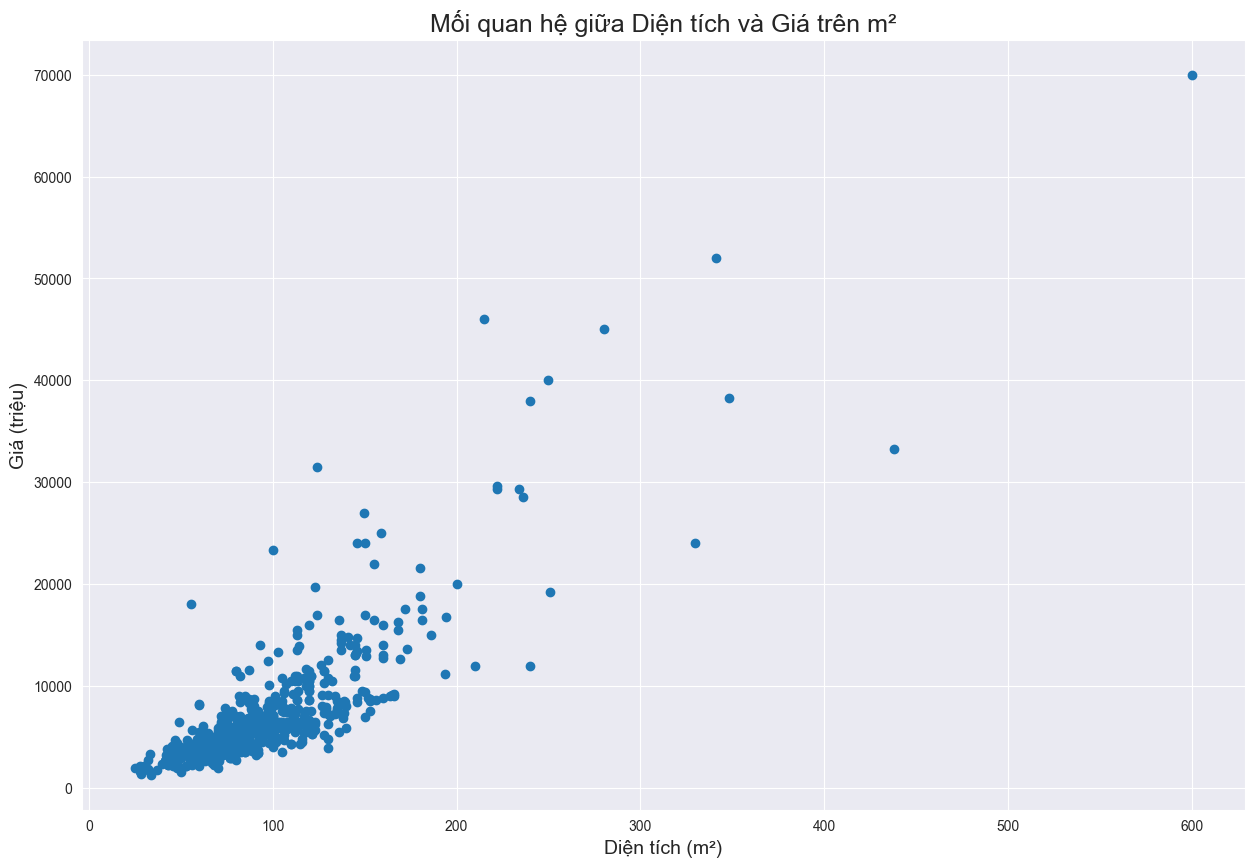

In [100]:
# Loại bỏ các mục không có giá trị giá tiền (sau khi đã xử lý)
filtered_data = [d for d in data if isinstance(d.get("price"), (int, float))]

# Vẽ biểu đồ scatter
x = [d.get("area") for d in filtered_data]
y = [d.get("price") for d in filtered_data]

# Tăng kích thước biểu đồ
plt.figure(figsize=(15, 10))
plt.scatter(x, y)
plt.title('Mối quan hệ giữa Diện tích và Giá trên m²', fontsize=18)
plt.xlabel('Diện tích (m²)', fontsize=14)
plt.ylabel('Giá (triệu)', fontsize=14)
plt.show()

 Biểu đồ cột (Bar Chart)

Biểu đồ cột được sử dụng để so sánh giá trung bình trên m² giữa các địa điểm khác nhau 


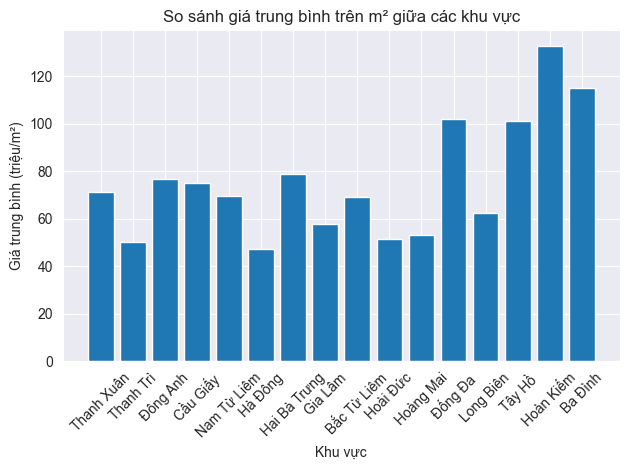

In [101]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Dictionary to store total price and count for each location
location_data = defaultdict(lambda: {"total_price_square": 0, "count": 0})

# Process each entry in the data
for entry in data:
    location = entry.get("location")
    # Check if location exists and price_square is available and not "deal"
    if location is not None and "price_square" in entry and entry["price_square"] != "deal":
        # Convert price_square to float
        price_square = float(entry["price_square"])  
        location_data[location]["total_price_square"] += price_square
        location_data[location]["count"] += 1

# Calculate average price per m² for each location
avg_price_per_m2 = {}
for location, values in location_data.items():
    if values["count"] > 0:
        avg_price_per_m2[location] = values["total_price_square"] / values["count"]

# Prepare data for plotting
locations = list(avg_price_per_m2.keys())
avg_prices = list(avg_price_per_m2.values())

# Create bar chart
plt.bar(locations, avg_prices)
plt.title('So sánh giá trung bình trên m² giữa các khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Giá trung bình (triệu/m²)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better fit
plt.show()


 Biểu đồ hộp (Box Plot)

Biểu đồ hộp hiển thị phân phối diện tích căn hộ giữa các khu vực khác nhau. Điều này giúp kiểm tra sự khác biệt về diện tích căn hộ giữa các khu vực.


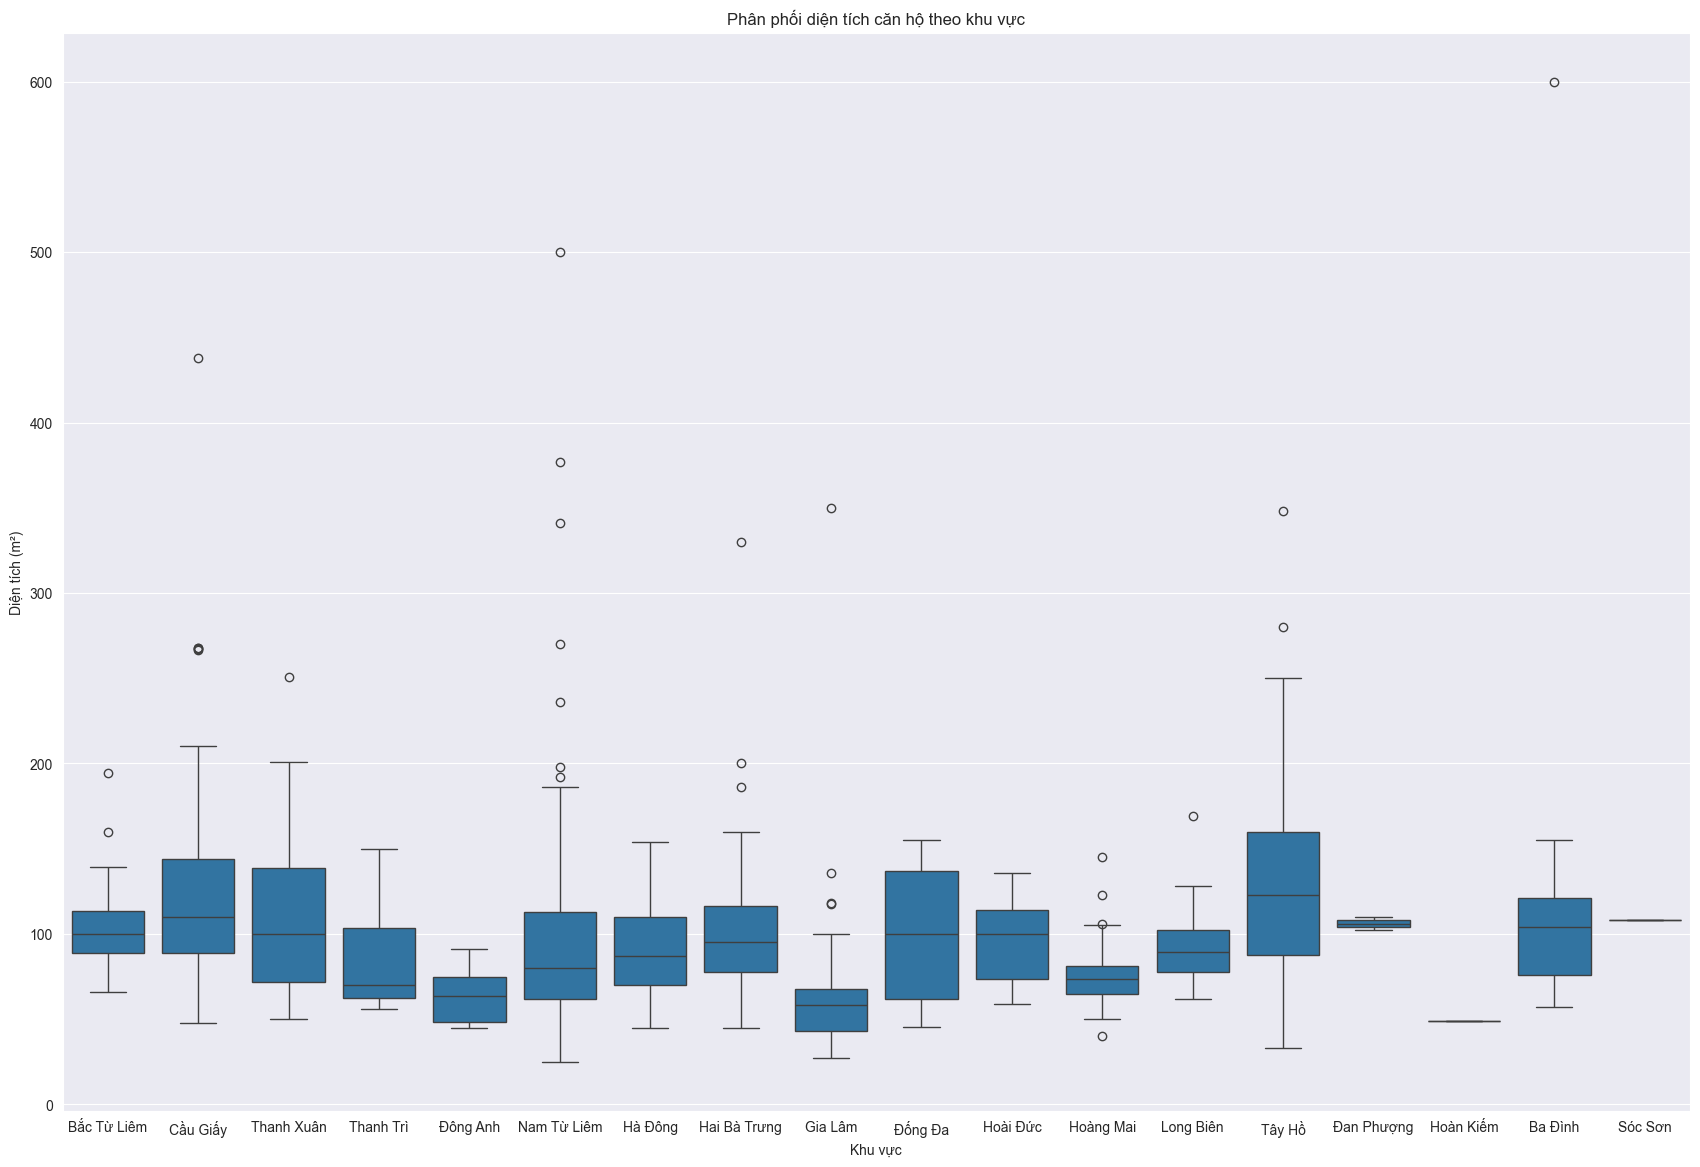

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame from the data
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(21, 14))

# Create a boxplot
sns.boxplot(x='location', y='area', data=df)

# Add titles and labels
plt.title('Phân phối diện tích căn hộ theo khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Diện tích (m²)')

# Show the plot
plt.show()



Biểu đồ phân phối (Histogram)

Biểu đồ phân phối hiển thị sự phân bổ diện tích của tất cả các căn hộ. Điều này giúp xác định phân phối của diện tích căn hộ trong tập dữ liệu.

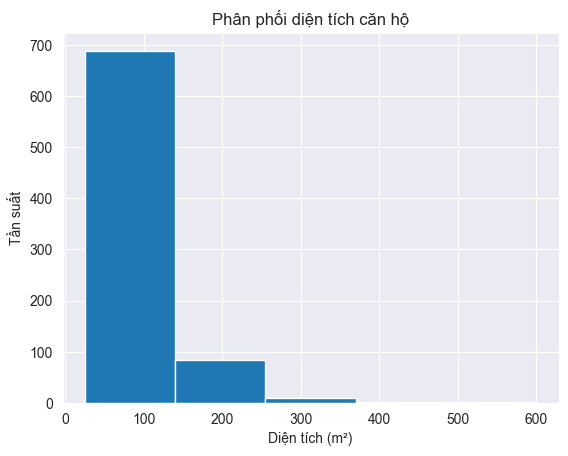

In [103]:
import matplotlib.pyplot as plt

# Dữ liệu diện tích
area_data = []
for entry in data:
    if "area" in entry:
        area_data.append(entry["area"])

plt.hist(area_data, bins=5)
plt.title('Phân phối diện tích căn hộ')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Tần suất')
plt.show()

- Giá trên m² có tương quan với diện tích căn hộ không? (sử dụng scatter plot để kiểm tra).
- Sự phân bố diện tích căn hộ giữa các khu vực có khác biệt không? (sử dụng box plot).
- vực nào có giá trung bình trên m² cao nhất? (sử dụng bar chart để so sánh giá trung bình).
- Phân phối diện tích căn hộ trông như thế nào? Liệu có bất kỳ sự thiên lệch nào trong dữ liệu diện tích? (sử dụng histogram).
- khu vực nào có giá trị bất thường không? (xem xét các giá trị trong box plot và scatter plot).


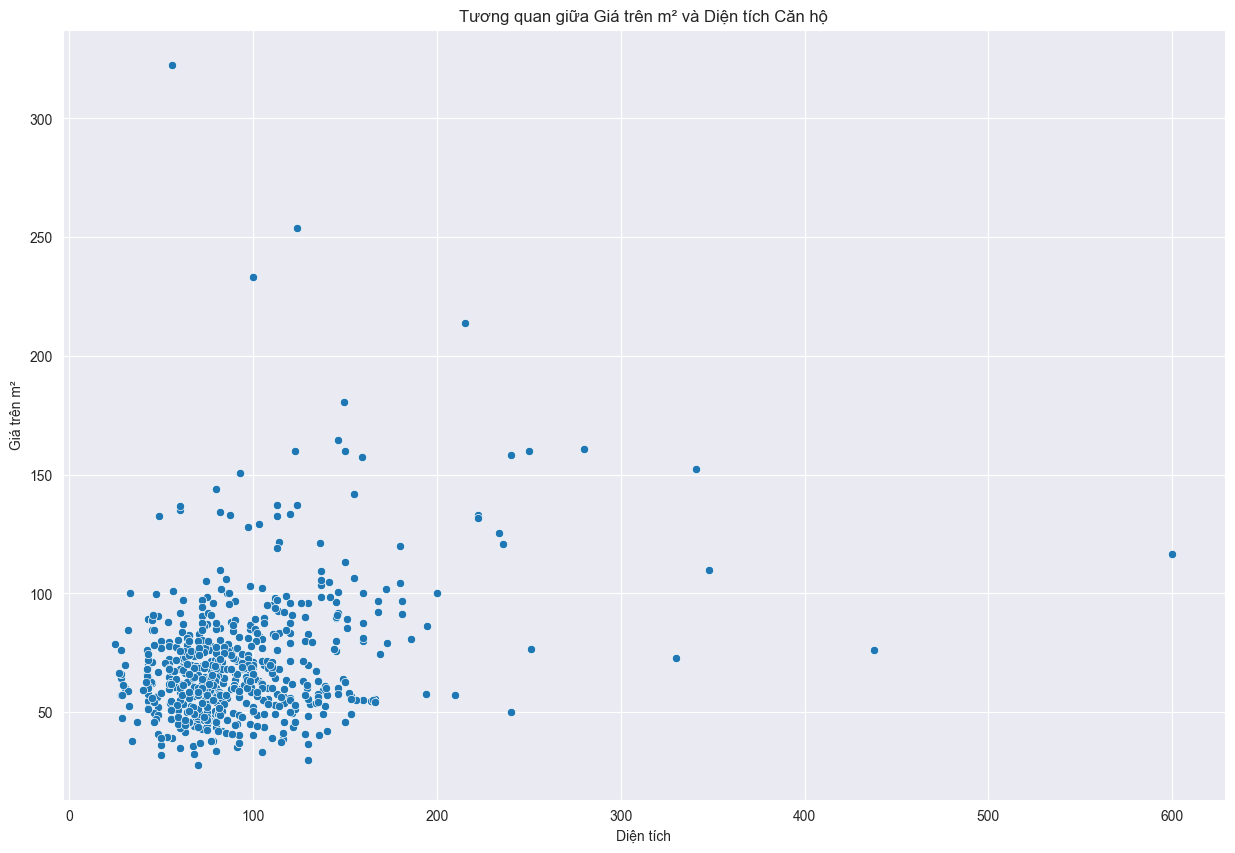

In [104]:
# Thay thế các giá trị không phải số bằng NaN và sau đó loại bỏ chúng
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['price_square'] = pd.to_numeric(df['price_square'], errors='coerce')

# Loại bỏ các hàng có giá trị NaN (có nghĩa là các giá trị không phải số ban đầu)
df = df.dropna(subset=['area', 'price_square'])

# Vẽ biểu đồ sau khi xử lý
plt.figure(figsize=(15, 10))
sns.scatterplot(x='area', y='price_square', data=df)

# Thêm tiêu đề và nhãn
plt.title('Tương quan giữa Giá trên m² và Diện tích Căn hộ')
plt.xlabel('Diện tích')
plt.ylabel('Giá trên m²')
plt.show()